In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)

iris.data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
iris.target

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
X, y = shuffle(iris.data.values, iris.target.values, random_state=0)
clf = DecisionTreeClassifier()
clf.fit(X, y)
clf

DecisionTreeClassifier()

In [5]:
from io import StringIO
from sklearn import tree
import pydotplus
from IPython.display import Image 

dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, feature_names=iris.feature_names,class_names=iris.target_names, filled=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

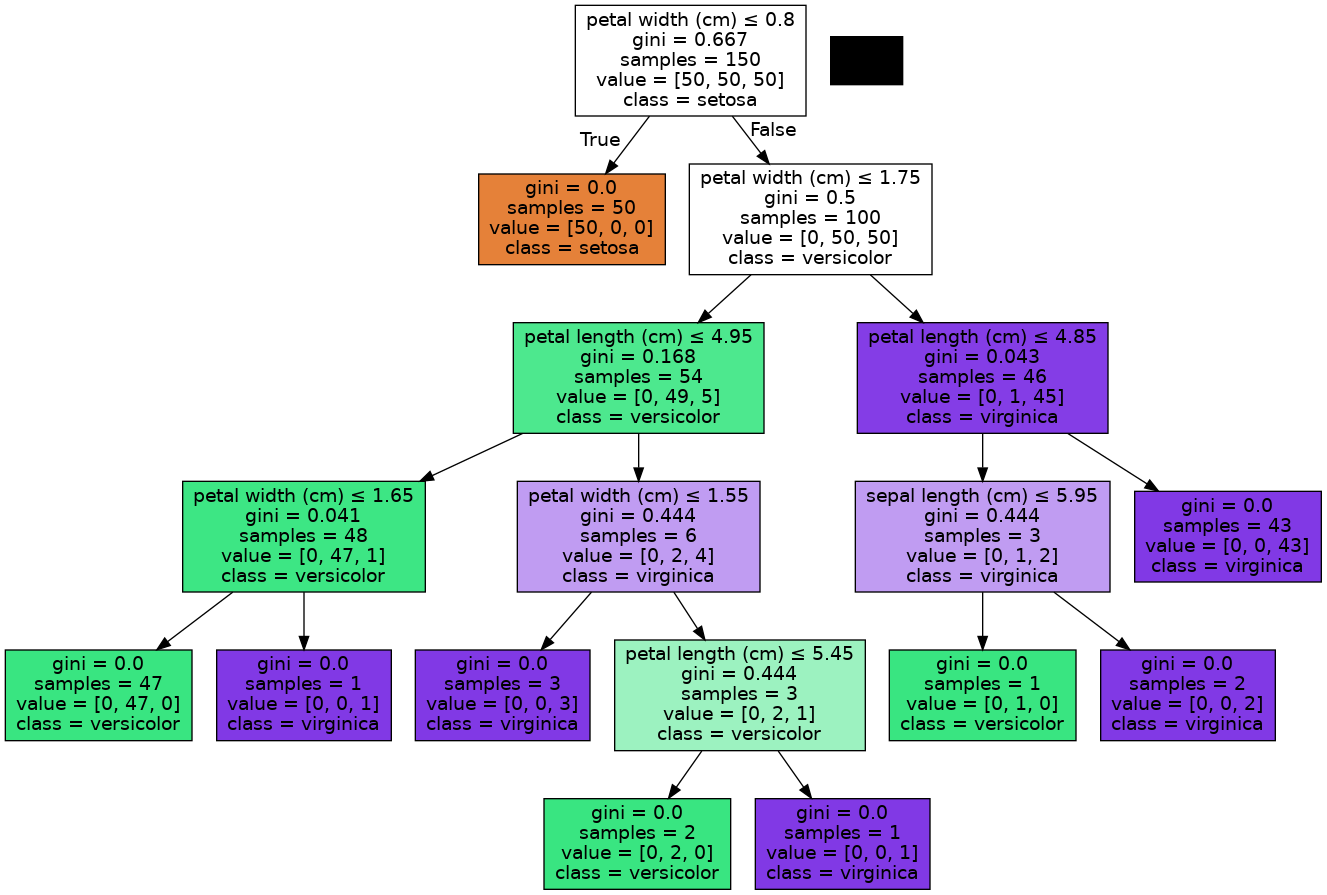

In [6]:
Image(graph.create_png())

In [7]:
from sklearn.datasets import fetch_covtype

fcover = fetch_covtype(as_frame=True)



In [8]:
fcover.target

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int32

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(fcover.data, fcover.target, test_size=0.25, random_state=0)

(435759, 54)

In [10]:
from sklearn.model_selection import GridSearchCV

max_depth = list(range(10, 20+1))
max_depth.append(None)

parameters = {
    'criterion': ['gini', 'entropy'],
    'max_depth': max_depth
}

clf = GridSearchCV(DecisionTreeClassifier(), parameters)

clf = clf.fit(X_train, y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeClassifier(criterion='entropy')
{'criterion': 'entropy', 'max_depth': None}


In [14]:
from sklearn.metrics import classification_report

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94     52943
           2       0.95      0.95      0.95     70897
           3       0.93      0.93      0.93      8890
           4       0.85      0.81      0.83       704
           5       0.84      0.85      0.84      2340
           6       0.89      0.89      0.89      4384
           7       0.95      0.95      0.95      5095

    accuracy                           0.94    145253
   macro avg       0.91      0.90      0.90    145253
weighted avg       0.94      0.94      0.94    145253

